In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [73]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [74]:
len(X_train)

60000

In [77]:
len(X_test)

10000

In [79]:
X_train.shape

(60000, 28, 28)

In [81]:
y_train.shape

(60000,)

In [83]:
X_train[0].shape

(28, 28)

In [85]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

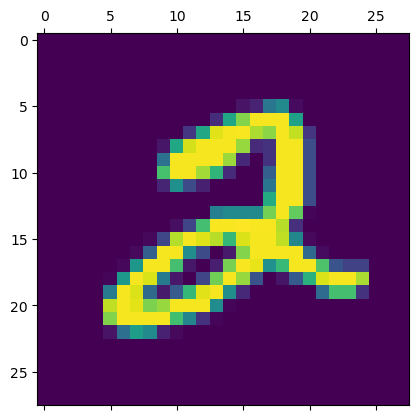

In [87]:
plt.matshow(X_train[5]);

In [88]:
y_train[5]

2

## Scaling

In [90]:
X_train=X_train/255
X_test=X_test/255

In [93]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building

In [97]:
# #Conv2D Layer 1:
# #Conv2D Layer:

# filters=32: 32 filters (kernels) will be used to extract features from the images.
# kernel_size=(3, 3): Each filter is 3x3 in size.
# activation='relu': The ReLU activation function introduces non-linearity to the model, allowing it to learn more complex patterns.
# input_shape=(28,28,1): Specifies the shape of input images (28x28 pixels with 1 color channel, which is grayscale).
# MaxPooling2D Layer: Reduces the spatial dimensions of the output from the previous Conv2D layer.

# pool_size=(2, 2) means it will take a 2x2 window and reduce it to the maximum value in that window.
# Flatten Layer: Flattens the 2D output (from Conv2D and MaxPooling2D) into a 1D vector so it can be fed into a dense layer.

# Dense Layers:

# First dense layer has 64 units with ReLU activation.
# Final dense layer has 10 units (since there are 10 classes in MNIST) with a softmax activation function, which outputs probabilities for each class.

model=keras.models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# optimizer='adam': Uses the Adam optimizer to adjusts the learning rate during training process.
# loss='sparse_categorical_crossentropy': Loss function for multi-class classification where labels are integers.It calculates the error between the predicted and actual labels.
# metrics=['accuracy']: Accuracy metric to evaluate model performance.

model.compile(optimizer='adam', #Optimizer: Controls how the model updates its weights to minimize errors during training.
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

#training the model
model.fit(X_train,y_train,epochs=11)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8917 - loss: 0.3572
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9824 - loss: 0.0581
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9883 - loss: 0.0397
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9917 - loss: 0.0274
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9937 - loss: 0.0203
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0136
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0115
Epoch 9/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9976 - loss: 0.0076
Epoch 10/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9975 - loss: 0.0077
Epoch 11/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9978 - loss: 0.0070


## Evaluate the Model

In [99]:
#Tests the model on the test set to see how well it performs on unseen data.
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0612


[0.04762254282832146, 0.9890000224113464]

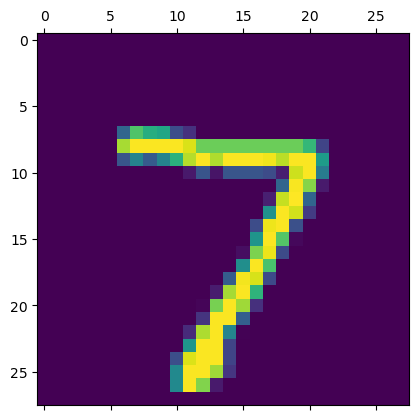

In [100]:
plt.matshow(X_test[0])
plt.show()

In [101]:
y_predicted=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [102]:
y_predicted[0]

array([8.8536149e-12, 1.5170539e-13, 8.4373686e-13, 3.1386355e-10,
       9.4010610e-10, 1.1968727e-12, 2.7449599e-21, 1.0000000e+00,
       6.3256948e-11, 2.6779021e-10], dtype=float32)

In [103]:
np.argmax(y_predicted[0])

7

In [104]:
y_pred=[np.argmax(i) for i in y_predicted]

In [105]:
y_pred[:5]

[7, 2, 1, 0, 4]

In [106]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm
# tf.math.confusion_matrix(labels=y_test, predictions=y_pred): Compares the actual labels (y_test) to the predicted labels (y_pred) and builds a confusion matrix.
# In this matrix:

# Each row represents the actual digit label (0 through 9).
# Each column represents the predicted digit label.
# The diagonal values in the matrix represent the correct predictions (where actual and predicted labels match), while off-diagonal values represent incorrect predictions.

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    1,    0,    0,    0,    0,    3,    1,    0],
       [   1,    0, 1026,    0,    0,    0,    0,    3,    2,    0],
       [   0,    0,    4, 1001,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    2,    0,    1,    6],
       [   0,    0,    0,    7,    0,  882,    1,    0,    2,    0],
       [  12,    3,    1,    0,    2,    3,  936,    0,    1,    0],
       [   1,    3,    8,    1,    0,    0,    0, 1008,    2,    5],
       [   2,    0,    2,    1,    0,    1,    0,    1,  965,    2],
       [   2,    0,    0,    0,    4,    4,    0,    2,    5,  992]])>

Text(95.72222222222221, 0.5, 'Truth')

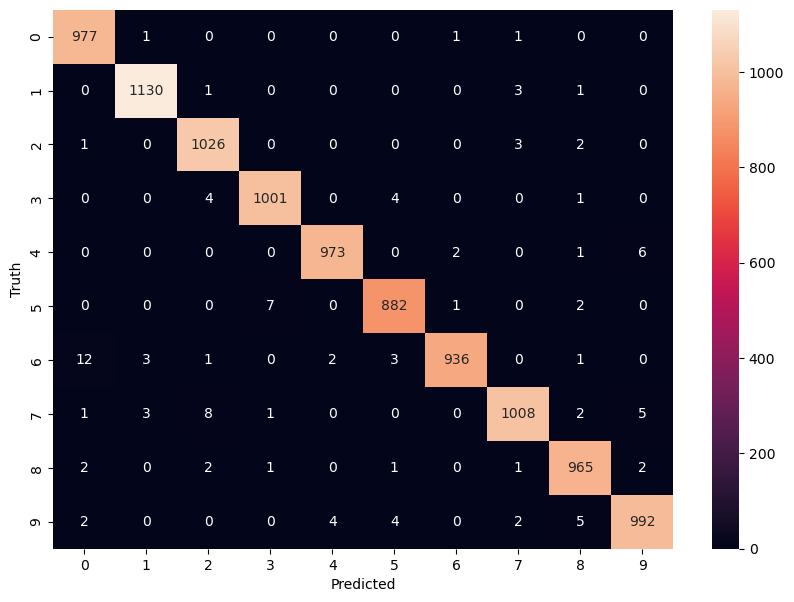

In [107]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')
#Uses Seaborn to display the confusion matrix as a heatmap. This makes it easy to see where the model performed well or made mistakes.

In [ ]:
# #  This function from Seaborn library plots the confusion matrix as a colored grid (heatmap).
# annot=True: Adds the count numbers on each cell for easy reference.
# fmt='d': Ensures that the annotations are displayed as integers.
# This heatmap visually highlights:

# The model’s strengths: where it correctly identified digits (diagonal values).
# The model’s weaknesses: where it misclassified digits (off-diagonal values).